In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
reviews = {
    "text": [
        "The movie was wonderful", "I enjoyed every moment",
        "Such a pleasant experience", "The product quality impressed me",
        "I absolutely love this", "It works perfectly for me",
        "The service was awful", "This was a horrible decision",
        "I regret buying this item", "Completely disappointing",
        "Such a bad experience", "I really hate this product"
    ],
    "label": [
        "positive","positive","positive","positive","positive","positive",
        "negative","negative","negative","negative","negative","negative"
    ]
}

df = pd.DataFrame(reviews)

In [3]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])
y = df["label"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)

In [5]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [6]:
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)

In [7]:
print("Accuracy:", acc)
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

Accuracy: 0.3333333333333333
Confusion Matrix:
[[1 1]
 [1 0]]


In [8]:
positive_texts = df[df["label"]=="positive"]["text"]
negative_texts = df[df["label"]=="negative"]["text"]

pos_freq = vectorizer.transform(positive_texts).sum(axis=0).A1
neg_freq = vectorizer.transform(negative_texts).sum(axis=0).A1

vocab = vectorizer.get_feature_names_out()

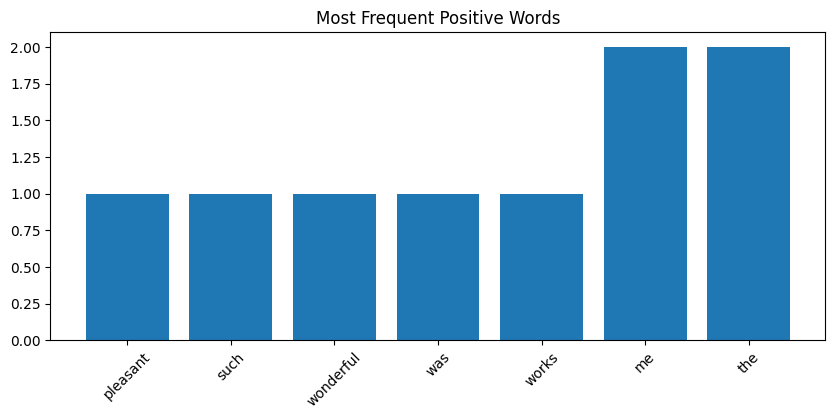

In [9]:
N = 7

top_p = pos_freq.argsort()[-N:]
plt.figure(figsize=(10,4))
plt.bar([vocab[i] for i in top_p], pos_freq[top_p])
plt.title("Most Frequent Positive Words")
plt.xticks(rotation=45)
plt.show()

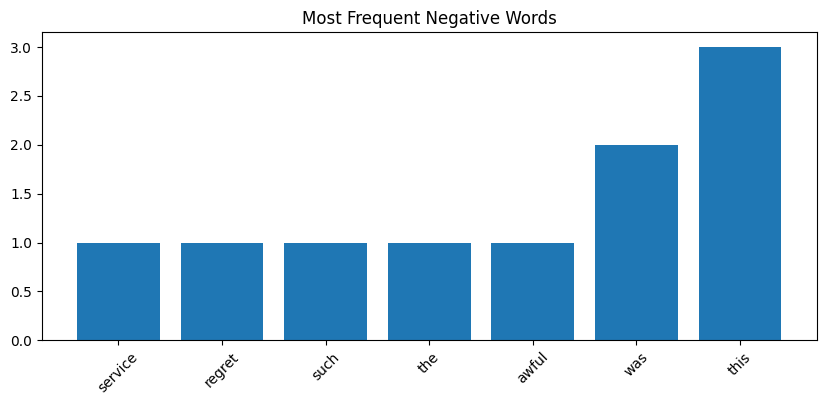

In [10]:
top_n = neg_freq.argsort()[-N:]
plt.figure(figsize=(10,4))
plt.bar([vocab[i] for i in top_n], neg_freq[top_n])
plt.title("Most Frequent Negative Words")
plt.xticks(rotation=45)
plt.show()

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dataset = {
    "text": [
        "This phone is excellent", "Really satisfied with the purchase",
        "The packaging was neat", "A great value for money",
        "I would recommend this", "Works very smoothly",
        "The device stopped working", "Totally not worth it",
        "It made my day worse", "Very poor performance",
        "The quality is terrible", "I am disappointed"
    ],
    "label": [
        "positive","positive","positive","positive","positive","positive",
        "negative","negative","negative","negative","negative","negative"
    ]
}

df = pd.DataFrame(dataset)

In [13]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df["text"])
y = df["label"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=5
)

In [15]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [16]:
preds = bnb.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Bernoulli NB Accuracy:", accuracy)

Bernoulli NB Accuracy: 0.3333333333333333


In [17]:
word_list = vectorizer.get_feature_names_out()
log_probs = bnb.feature_log_prob_

In [18]:
prob_neg = np.exp(log_probs[0])
prob_pos = np.exp(log_probs[1])

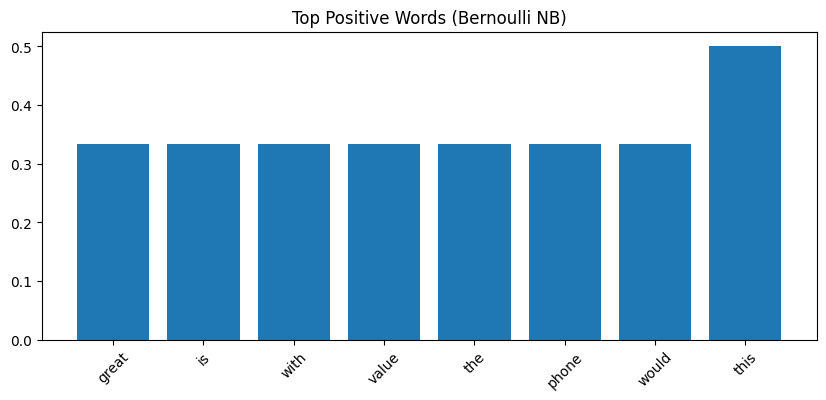

In [19]:
idx_pos = prob_pos.argsort()[-8:]
plt.figure(figsize=(10,4))
plt.bar([word_list[i] for i in idx_pos], prob_pos[idx_pos])
plt.title("Top Positive Words (Bernoulli NB)")
plt.xticks(rotation=45)
plt.show()

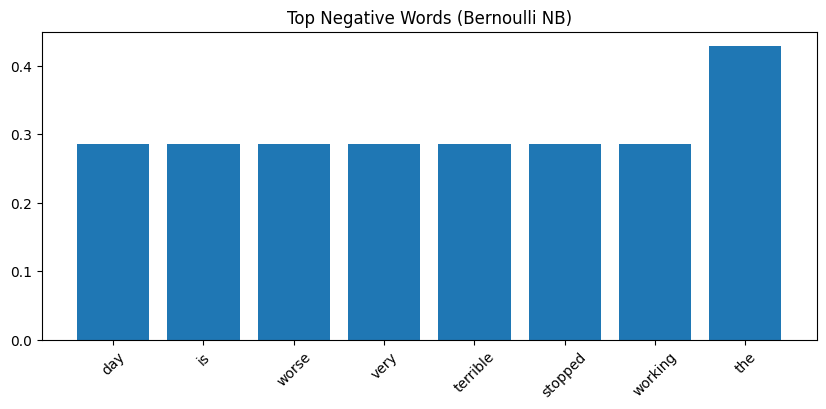

In [20]:
idx_neg = prob_neg.argsort()[-8:]
plt.figure(figsize=(10,4))
plt.bar([word_list[i] for i in idx_neg], prob_neg[idx_neg])
plt.title("Top Negative Words (Bernoulli NB)")
plt.xticks(rotation=45)
plt.show()